In [176]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math, time, sys, os

In [177]:
# All SI units
mass = 12
k = 100 #Spring constant
g = 9.81
dt = 0.001
t0 = 0
t1 = 11
y0 = 0.2 #Initial displacement
v0 = 0.1 #Initial velocity

t = np.linspace(t0, t1, round(1+(t1-t0)/dt))
y_num = np.zeros(len(t))
v_num = np.zeros(len(t))
y_num[0] = y0
v_num[0] = v0

Ekin = np.zeros(len(t))
Epot = np.zeros(len(t))

In [178]:
def derrivative(state, t):
    """Takes an array state with entries 0 (displacement) and 1 (velocity) as input and outputs an              array with velocity and acceleration""" 
    y = state[0]
    v = state[1]
    a = g -(k*y)/mass
    return [v, a]

In [179]:
for i in range(len(t)-1):
    derriv = derrivative([y_num[i], v_num[i]], t[i])
    y_num[i+1] = y_num[i] + derriv[0]*dt
    v_num[i+1] = v_num[i] + derriv[1]*dt

    # Checking for 0, if the value is positve and becomes negative zero is passed and vice versa.
    if np.sign(y_num[i]) != np.sign(y_num[i+1]):
        print(t[i+1])

0.2241720580801979


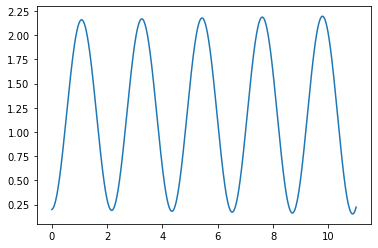

In [180]:
plt.plot(t, y_num)
print(y_num[-1])

6.982206973016254


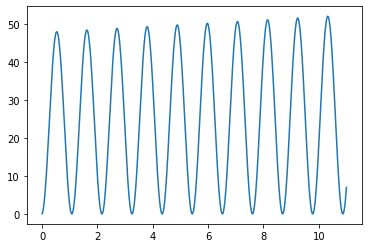

In [181]:
for i in range(len(t)):
    Ekin[i] = 0.5*mass*v_num[i]**2
plt.plot(t, Ekin)
print(Ekin[-1])

-2.3328790960053176


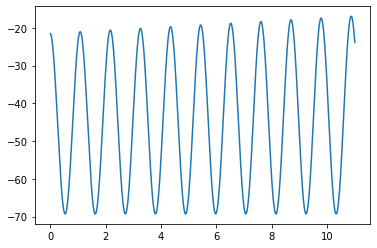

In [182]:
for i in range(len(t)):
    Epot[i] = 0.5*k*y_num[i]**2 - mass*g*y_num[i]
plt.plot(t, Epot)
print(Epot[-1]-Epot[0])

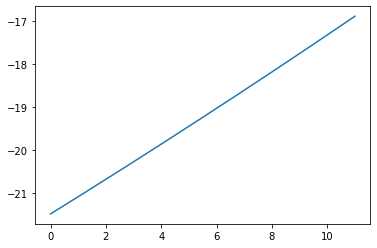

In [183]:
plt.plot(t, Ekin+Epot)

0.2668976268321039


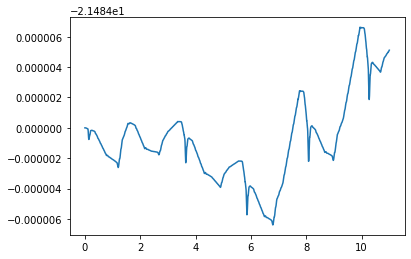

In [184]:
result = integrate.odeint(derrivative, [y0, v0], t)
y_num_2 = result[:,0]
v_num_2 = result[:,1]

for i in range(len(t)):
    Ekin[i] = 0.5*mass*v_num_2[i]**2

for i in range(len(t)):
    Epot[i] = 0.5*k*y_num_2[i]**2 - mass*g*y_num_2[i]

plt.plot(t, Ekin+Epot)
print(y_num_2[-1])
